# Chapter 3: Classification

In chapter 2 we explored a regression task, predicting house values, using various algorithms which will be explained in further detail in the coming chapters of the book. (Regarding the theory part I would recommend that you please read the book to understand it better. This course is code oriented, so not much theory will be covered).

Now we will turn our attention to classification systems.

## MNIST

In this chapter we will be using the MNIST dataset, which is set of 70,000 small images of digits which are handwritten. Each image is labelled with the digit it represents.

This set has been studied so much that it is often called the *hello world* of Machine Learning.

In [1]:
# Scikit-Learn provides many helper functions to downlad popular datasets, in which MNIST is one of them. The following code fetches the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-learn generally have a similar dictionary structure as above including the following:
* A `DESCR` key describing the dataset
* A `data` key containing an array with one row per instance and one column per feature.
* A `target` key containing an array of labels.

Let's look at these arrays:

In [2]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

There are 70,000 images and each image has 784 features. This is because each feature is a pixel intensity (from 0 (white) to 255 (black)) and each image is made up of 28 * 28 pixels.
Let us become one with data.

In [3]:
X.values[0].shape

(784,)

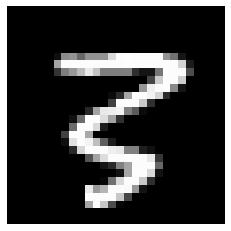

In [4]:
# visualize 1 image at a time.
import matplotlib.pyplot as plt
import random

rand_index = random.randint(0, len(X))
rand_image = X.values[rand_index].reshape((28, 28))

plt.imshow(rand_image, cmap=plt.cm.gray)
plt.axis(False);

In [5]:
y[rand_index]

'3'

In [6]:
import numpy as np
y = y.astype(np.uint8)

In [7]:
# Creating training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

## Training a Binary Classifier

Let's simplify the problem for now and try only to identify one-digit-for example the number 5.

This "5-detector" will be an example of a *binary classifier*, capable of distinguishing between just two classes, 5 and not 5.

Let's create the target vectors for the classification task:

In [8]:
y_train_5 = (y_train == 5) # True for all 5's, False for all other digits
y_test_5 = (y_test == 5)

Now let's pick a classifier and train it. A good place to start is with a *Stoachistic Gradient Descent* (SGD) classifier, using Scikit-Learn's `SGDClassifier` class.

Let's create an `SGDClassifier` and train it on the whole training set:

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train.to_numpy(), y_train_5)

SGDClassifier(random_state=42)

> 🔑 **Note:** The `SGDClassifier` relies on randomness during training (hence the name *stochastic*). If you want reproducible results, you should set the `random_state` parameter.

In [14]:
sgd_clf.predict([rand_image.reshape((784,))])

array([False])